[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


please input some text to visualise the words in space :-

We need a great prime minister. current prime minister needs some improvements. situation is DEPRICIATED in the country. our condition is getting bad day after day.


['We', 'need', 'a', 'great', 'prime', 'minister', 'current', 'needs', 'some', 'improvements', 'situation', 'is', 'DEPRICIATED', 'in', 'the', 'country', 'our', 'condition', 'getting', 'bad', 'day', 'after']
Total words extracted - 22 words

shape -  (22, 50)
Applying PCA to reduce to 2D for visualization 
 new shape -  (22, 2)


<ipython-input-1-3a8ad6338cbf>:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[model.wv.vocab]
C:\Users\shank\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\shank\anaconda3\lib\site-packages\matplotlib\text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
C:\Users\shank\anaconda3\lib\site-packages\matplotlib\text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
C:\Users\shank\anaconda3\lib\site-packages\matplotlib\text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
C:\Users\shank\anaconda3\lib\site-packages\matplotlib\text.py:829:

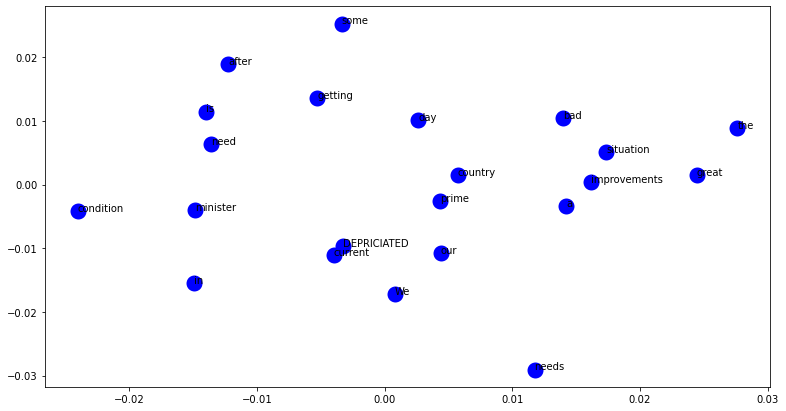

In [1]:
from gensim.models import Word2Vec
import pandas as pd
import nltk
import re
nltk.download('punkt')
import numpy as np

text = input('please input some text to visualise the words in space :-\n\n')
text=re.sub(r"[^.A-Za-z]",' ',text)
sentence=text.split('.')
tokens=[nltk.word_tokenize(words) for words in sentence]
model = Word2Vec(tokens,size=50,sg=1,min_count=1)
words=list(model.wv.vocab)
print("\n")
print(words)
X=model[model.wv.vocab]
df=pd.DataFrame(X)
print(f"Total words extracted - {len(words)} words")
print("\nshape - ",df.shape)
# df.head()

#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)
print("Applying PCA to reduce to 2D for visualization \n new shape - ",neww_X.shape)

# now lets visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

In [2]:
#references - saket Thavanani